<h1>Calculating Distance from Centre of Polygon to Nearest Stores (New Mexico)</h1>

In [4]:

setwd("~/160/hey")

library(rgdal)
library(fields)
library(pdist)


Loading required package: spam
Loading required package: grid
Spam version 1.4-0 (2016-08-29) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps


<b>Centroid and store Shapefiles</b>

In [2]:
nm_cen<-readOGR(dsn=path.expand("~/160/hey"), layer="nm_centre1")
nm_liq<-readOGR(dsn=path.expand("~/160/hey"), layer="new_nm_liq")

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\jenat\OneDrive\Documents/160/hey", layer: "nm_centre1"
with 499 features
It has 54 fields
OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\jenat\OneDrive\Documents/160/hey", layer: "new_nm_liq"
with 2583 features
It has 46 fields
Integer64 fields read as strings:  FID_ 


In [24]:
nm_cen[1:20]

              coordinates STATEFP COUNTYFP TRACTCE             AFFGEOID
1   (-106.5245, 35.11987)      35      001  000110 1400000US35001000110
2    (-106.489, 35.10728)      35      001  000112 1400000US35001000112
3   (-106.5421, 35.12708)      35      001  000117 1400000US35001000117
4   (-106.5776, 35.12753)      35      001  000203 1400000US35001000203
5   (-106.5606, 35.06821)      35      001  000901 1400000US35001000901
6   (-106.6371, 35.09633)      35      001  002000 1400000US35001002000
7   (-106.5419, 35.14341)      35      001  003717 1400000US35001003717
8   (-106.5467, 35.18648)      35      001  003732 1400000US35001003732
9    (-106.704, 34.96789)      35      001  004602 1400000US35001004602
10  (-106.7123, 35.04899)      35      001  004735 1400000US35001004735
11  (-106.7254, 35.08713)      35      001  004741 1400000US35001004741
12  (-104.5503, 33.38848)      35      005  000202 1400000US35005000202
13  (-104.8276, 33.28675)      35      005  001102 1400000US3500

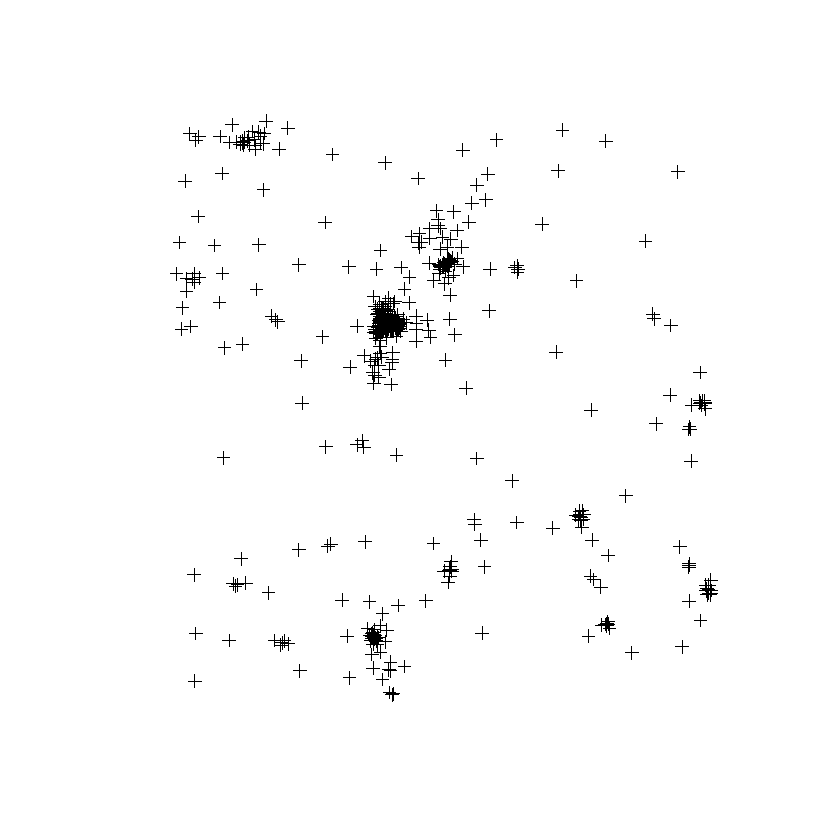

In [23]:
plot(nm_cen)

<b>Liq. Stores</b>

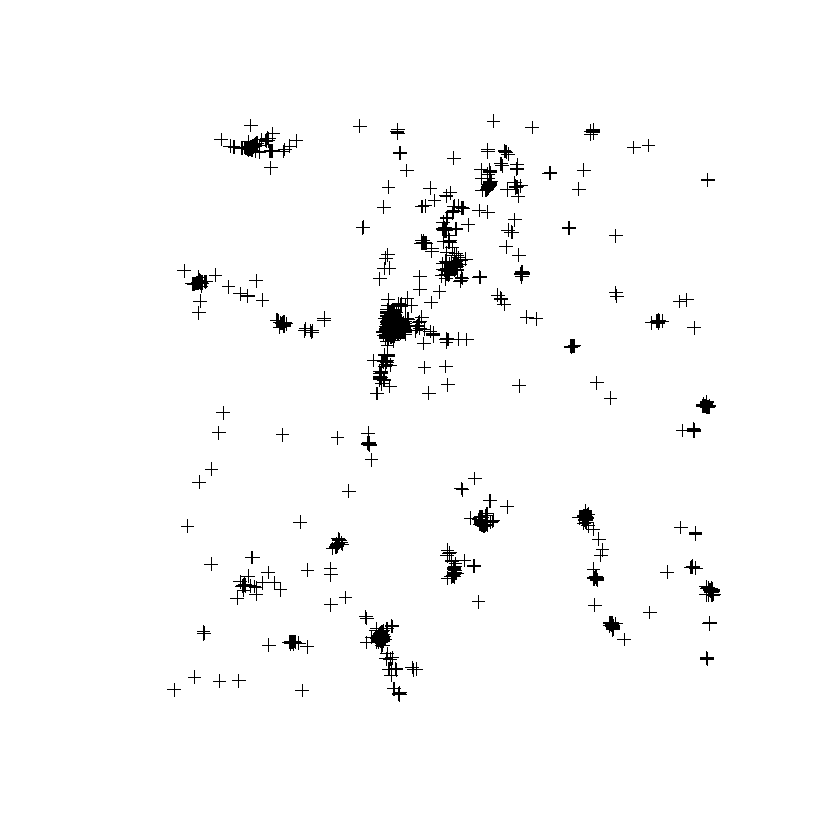

In [21]:
plot(nm_liq)

In [27]:
nm_liq[1:10]

               coordinates FID_    MatchCd LICNO LICNOTxt LICSTAT    EXPDATE
1    (-106.5501, 35.12864)    0     GC New 31097    31097  Active 2016/10/31
2     (-106.597, 35.13132)    0     GC New 31100    31100  Active 2016/10/31
3    (-106.7129, 35.02348)    0     GC New 31101    31101  Active 2016/10/31
4    (-106.6294, 35.05894)    0     GC New 31102    31102  Active 2016/10/31
5    (-106.6086, 35.17049)    0     GC New 31107    31107  Active 2016/10/31
6     (-106.651, 35.08481)    0     GC New 31108    31108  Active 2016/10/31
7    (-106.6232, 35.08068)    0     GC New 31113    31113  Active 2016/10/31
8     (-106.5815, 35.1473)    0     GC New 31114    31114  Active 2016/10/31
9    (-106.5674, 35.10872)    0     GC New 31115    31115  Active 2016/10/31
10   (-106.5163, 35.11938)    0     GC New 31121    31121  Active 2016/10/31
11   (-106.6129, 35.08019)    0     GC New 31123    31123  Active 2016/10/31
12   (-106.5566, 35.14727)    0     GC New 31124    31124  Active 2016/10/31

<b>Distance Matrices for both shapefiles</b>

In [6]:
cen_dist = rdist(nm_cen$xcoord,nm_cen$ycoord, compact = FALSE)
nm_liq_dist = rdist(nm_liq$LONG_, nm_liq$LAT, compact = FALSE)

In [17]:
cen_dist[1:20]

[1] 141.6443 141.6088 141.6620 141.6975 141.6805 141.7570 141.6617 141.6666
 [9] 141.8239 141.8322 141.8452 139.6702 139.9475 139.8425 138.3515 138.4385
[17] 141.6922 141.7105 139.3458 143.3330

In [18]:
nm_liq_dist[1:20]

[1] 141.6787 141.7256 141.8415 141.7581 141.7373 141.7796 141.7518 141.7101
 [9] 141.6960 141.6449 141.7416 141.6852 141.7521 141.7616 141.6256 141.7086
[17] 141.7036 141.7197 139.8339 141.7962

<b>Euclidean distance between both distance matrices.</b>

In [7]:
dists <- pdist(t(cen_dist), t(nm_liq_dist))
as.matrix(dists)

34.19657,34.19913,34.17881,34.16675,34.24850,34.16954,34.16843,34.21657,34.18081,34.18851,...,36.66845,45.47135,36.66109,45.09518,36.51532,45.14564,36.52778,45.53816,38.74662,45.53816
34.20950,34.21256,34.17242,34.16689,34.26909,34.17443,34.17257,34.23293,34.19009,34.19976,...,36.77150,45.65743,36.76399,45.27924,36.61550,45.32997,36.62820,45.72458,38.88007,45.72458
34.19019,34.19248,34.18350,34.16771,34.23773,34.16778,34.16711,34.20824,34.17654,34.18312,...,36.61029,45.36523,36.60300,44.99023,36.45878,45.04052,36.47113,45.43184,38.67092,45.43184
34.18983,34.19209,34.18382,34.16780,34.23708,34.16770,34.16704,34.20775,34.17628,34.18282,...,36.60669,45.35863,36.59940,44.98369,36.45529,45.03398,36.46762,45.42523,38.66621,45.42523
34.26433,34.26892,34.16736,34.18206,34.34759,34.20436,34.20012,34.29832,34.23362,34.24933,...,37.10300,46.24096,37.09509,45.85667,36.93830,45.90825,36.95173,46.30919,39.30407,46.30919
34.22264,34.22613,34.16875,34.16890,34.28886,34.18058,34.17806,34.24903,34.20005,34.21143,...,36.86263,45.82004,36.85501,45.44012,36.70416,45.49109,36.71708,45.88751,38.99739,45.88751
34.17857,34.18021,34.19693,34.17271,34.21614,34.16660,34.16691,34.19217,34.16965,34.17369,...,36.48085,45.12610,36.47372,44.75376,36.33309,44.80369,36.34511,45.19224,38.50143,45.19224
34.16655,34.16651,34.25099,34.20452,34.17785,34.18216,34.18506,34.16843,34.17017,34.16751,...,36.15484,44.50355,36.14821,44.13845,36.01720,44.18741,36.02839,44.56844,38.06747,44.56844
34.50597,34.51442,34.25636,34.32278,34.64916,34.38269,34.37245,34.56677,34.44656,34.47763,...,38.03279,47.77972,38.02389,47.38081,37.84682,47.43436,37.86203,47.85050,40.45874,47.85050
34.29942,34.30474,34.17304,34.19770,34.39425,34.22723,34.22184,34.33860,34.26318,34.28186,...,37.27250,46.53136,37.26440,46.14415,37.10360,46.19612,37.11739,46.60010,39.51806,46.60010
34.23502,34.23887,34.16702,34.17193,34.30682,34.18709,34.18401,34.26389,34.20977,34.22256,...,36.94026,45.95724,36.93256,45.57589,36.77973,45.62704,36.79283,46.02496,39.09688,46.02496


<b>Median value of the Euclidean distance calculation between both matrices</b>

In [11]:
median(as.matrix(dists))

[1] 42.60516

The Median length between the centorid of each polygon to the nearest store is 42.605 degrees.

<b>Convert latitude degrees to miles</b>

Length of 1 degree of Longitude = cosine (latitude in decimal degrees) * length of degree (miles) at equator.

cos(42.605) * 69.172 = `50.913 miles`, the median distance in miles from the centorid of each polygon and to the nearest store is 50.913 miles.